# Contents
# 1. Data Import
# 2. Data Checking, cleaning
# 3. Find k score
# 4. Apply kmeans
# 5. Interpretation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 1. Data Import

In [5]:
# Define file path
path = r'/Users/alison/Documents/Data Analysis - Tasks/6.1' 
# Get Electric Vehicle df
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared', 'EV_cleaner.pkl'))

# 2. Data Cleaning 

In [7]:
df.shape

(235688, 17)

In [9]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,ER
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Long-range
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10,Long-range
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,Unknown
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10,Mid-range
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10,Mid-range


In [11]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                    float64
ER                      

# 3. Find k score

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
EV_df = df[['Model Year', 'Electric Range', 'Base MSRP']]

In [17]:
EV_df.head()

,Model Year,Electric Range,Base MSRP
0,2019,220.0,0.0
1,2020,291.0,0.0
2,2023,0.0,0.0
3,2021,30.0,0.0
4,2023,42.0,0.0


In [19]:
score = [kmeans[i].fit(EV_df).score(EV_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-11703157400428.312,
 -1122059076411.398,
 -375902551543.66077,
 -251384291064.3417,
 -113351618702.8579,
 -96597034802.93419,
 -26637667562.13794,
 -16109877627.685051,
 -12810063139.54106]

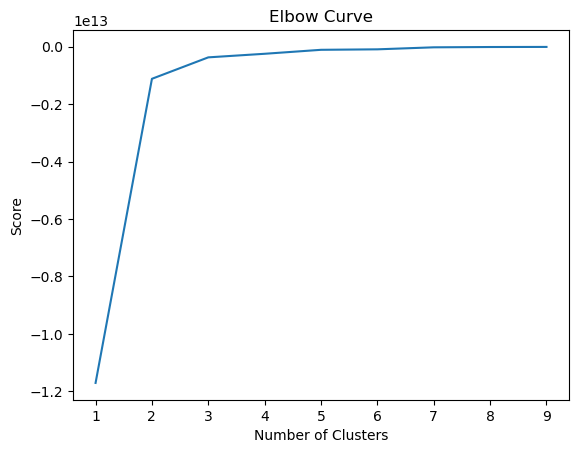

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 

In [25]:
# Fit the k-means object to the data.

kmeans.fit(EV_df)

KMeans(n_clusters=2)

# 4. Apply kmeans

In [27]:
EV_df['clusters'] = kmeans.fit_predict(EV_df)

/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_19326/837061760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EV_df['clusters'] = kmeans.fit_predict(EV_df)


In [29]:
EV_df.head()

,Model Year,Electric Range,Base MSRP,clusters
0,2019,220.0,0.0,0
1,2020,291.0,0.0,0
2,2023,0.0,0.0,0
3,2021,30.0,0.0,0
4,2023,42.0,0.0,0


In [31]:
EV_df['clusters'].value_counts()

clusters
0    232401
1      3287
Name: count, dtype: int64

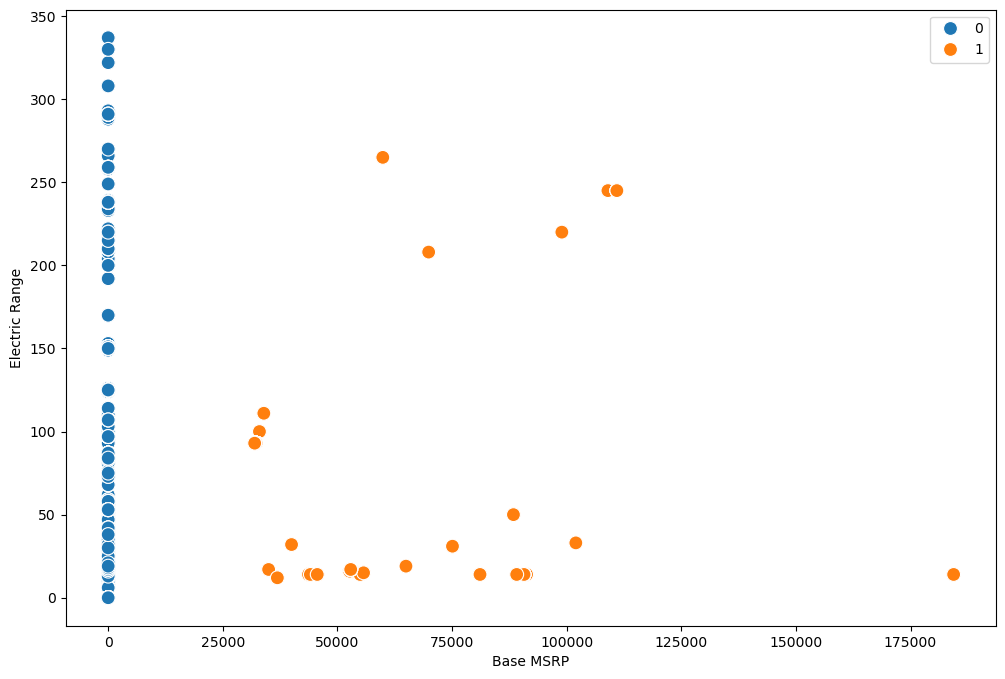

In [33]:
# Plot the clusters for the "Base MSRP" and "Electric Range" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=EV_df['Base MSRP'], y=EV_df['Electric Range'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Base MSRP') # Label x-axis.
plt.ylabel('Electric Range') # Label y-axis.
plt.show() # clusters represent unknown BASE MSRP, vs real values

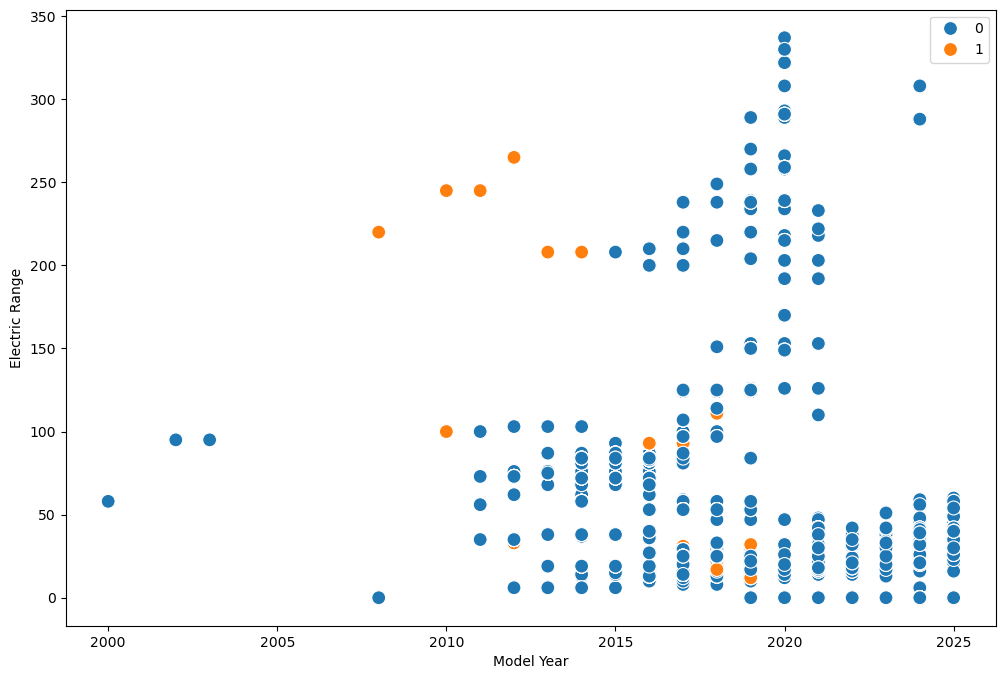

In [35]:
# Plot the clusters for the "Model Year" and "Electric Range" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=EV_df['Model Year'], y=EV_df['Electric Range'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Model Year') 
plt.ylabel('Electric Range') 
plt.show() # more long range EVS in market post 2016, 

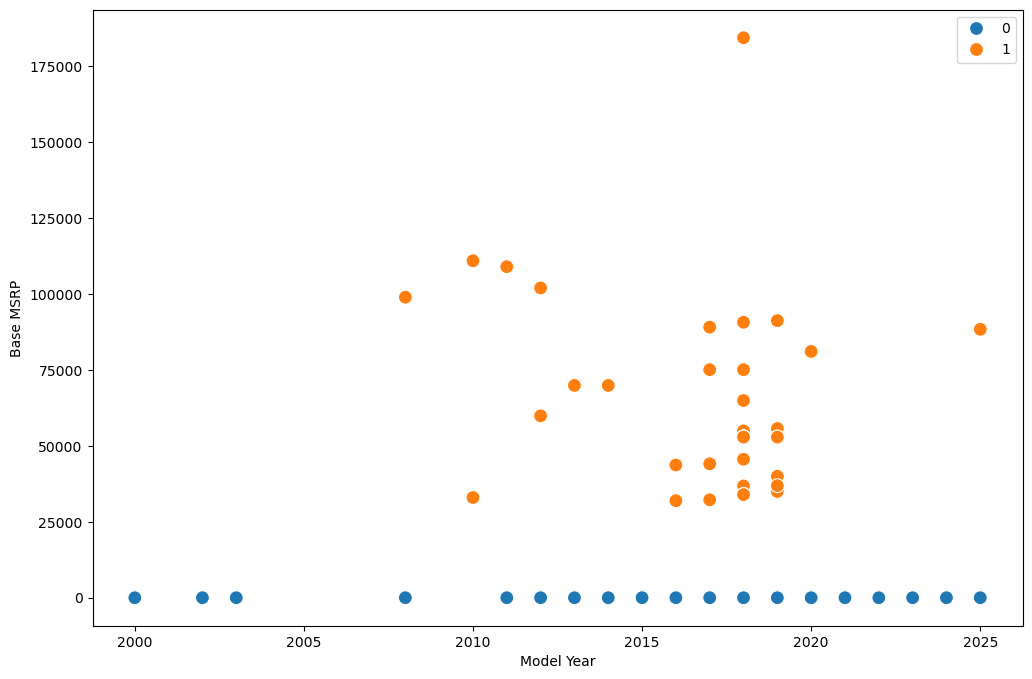

In [37]:
# Plot the clusters for the "Model Year" and "Base MSRP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=EV_df['Model Year'], y=EV_df['Base MSRP'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Model Year') 
plt.ylabel('Base MSRP') 
plt.show() # more expensive/luxury EVs on market since 2008. Was this when Tesla began?

In [39]:
EV_df.loc[EV_df['clusters'] == 1, 'cluster'] = 'yellow'
EV_df.loc[EV_df['clusters'] == 0, 'cluster'] = 'blue'

/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_19326/1050460541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EV_df.loc[EV_df['clusters'] == 1, 'cluster'] = 'yellow'


In [41]:
EV_df.groupby('cluster').agg({'Model Year':['mean', 'median'], 
                         'Base MSRP':['mean', 'median'], 
                         'Electric Range':['mean', 'median']})

Model Year            Base MSRP          Electric Range       
                mean  median         mean   median           mean median
cluster                                                                 
blue     2021.486939  2023.0      0.00000      0.0      45.216419    0.0
yellow   2015.734713  2016.0  57136.66474  59900.0     120.256465   93.0

# 5. Interpretation
# Yellow mean and median seem to reflect real world EV pricing.  
# Yellow ER shows mid-range values. Is ideal EV mid-range ER and moderate price? Potential to investigate if highest sales of EVs have these features. 
# Could I use yellow mean to replace NaN in Base MSRP column?
# BEVs since 2019 have ER of 30 miles min, not recorded as 30 but rather as 0. Blue cluster ER may be lower than real world due to data collection. Next steps - Split data to pre and post 2019 and look for differences. 

In [80]:
# Export data to pkl

EV_df.to_pickle(os.path.join(path, '02 Data','Prepared', 'EV_cluster.pkl'))